# Exploratory Data Analysis

**Por que debería hacer un análisis exploratorio de datos?**

Organizar y entender las variables: podrás identificar los diferentes tipos de variables, las categorías a la que pertenecen y el tipo de análisis que puedes realizar sobre ellas.

Establecer relaciones entre las variables

Encontrar patrones ocultos en los datos: podrás encontrar información o comportamientos relevantes cuando hagas el EDA.

Ayuda a escoger el modelo correcto para la necesidad correcta: una vez encuentres como están relacionadas las variables podrás descubrir las variables que mas se ajustan a un tipo de modelo y de esta manera eligiras el correcto
Ayuda a tomar decisiones informadas: decisiones basadas en los datos, en las relaciones que encuentres entre variables, en patrones ocultos y en los modelos que generes a través de la EDA

Pasos de una Análisis Exploratorio de Datos

Hacer preguntas sobe los datos. Hazte las siguientes preguntas para guiar el EDA:
Que te gustaria encontrar?

Que quisieras saber de los datos?

Cual es la razon para realizar el analisis?

Determinar el tamaño de los datos. Debes responder preguntas como:

Cuantas observaciones existen?

Cuantas variables hay?

Necesito todas las observaciones?

Necesito todas las variables?

Categorizar las variables. Debes preguntarte:

Cuantas variables categóricas existen?

Cuantas variables continuas existen?

Como puedo explorar cada variable dependiendo de su categoría?

Limpieza y validación de los datos. En ese paso debes preguntarte:

Tengo valores faltantes?

Cual es la proporción de datos faltantes?

Como puedo tratar a los datos faltantes?

Cual es la distribución de los datos?

Tengo valores atipicos?

Establecer relaciones entre los datos. Responde preguntas como:

Existe algun tipo de relacion entre mi variable X y Y?

Que pasa ahora si considero la variable Z en el analisis?

Que significa que las observaciones se agrupen?

Que significa el patron que se observa?

Este proceso es ciclico. A pesar de que pueda parecer infinito, este proceso en algun momento debe salir del ciclo y continuar para obtener algun tipo de valor

In [156]:
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf 
import matplotlib.pyplot as plt
import scipy
import empiricaldist

In [154]:
# !pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 373.4 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 701.5 kB/s eta 0:00:00a 0:00:01


In [2]:
datos= pd.read_csv('https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv')

In [3]:
datos.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

## Cuantas variables y observaciones hay en los datos?

In [6]:
datos.shape

(344, 8)

## Existen valores nulos explicitos en la tabla?

In [7]:
datos.isnull()

species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0      False   False           False          False              False   
1      False   False           False          False              False   
2      False   False           False          False              False   
3      False   False            True           True               True   
4      False   False           False          False              False   
..       ...     ...             ...            ...                ...   
339    False   False           False          False              False   
340    False   False           False          False              False   
341    False   False           False          False              False   
342    False   False           False          False              False   
343    False   False           False          False              False   

     body_mass_g    sex   year  
0          False  False  False  
1          False  False  False  
2          False  False  False  
3           True   True  False  
4          False  False  False  
..           ...    ...    ...  
339        False  False  False  
340        False  False  False  
341        False  False  False  
342        False  False  False  
343        False  False  False  

[344 rows x 8 columns]

In [8]:
datos.isnull().any()

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
year                 False
dtype: bool

## Cuantos valores nulos hay en cada variable?

In [9]:
datos.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [10]:
datos.isnull().sum().sum()

19

## Cual es la proporcion de valores nulos por variable?

In [11]:
datos.isnull().melt()

variable  value
0     species  False
1     species  False
2     species  False
3     species  False
4     species  False
...       ...    ...
2747     year  False
2748     year  False
2749     year  False
2750     year  False
2751     year  False

[2752 rows x 2 columns]

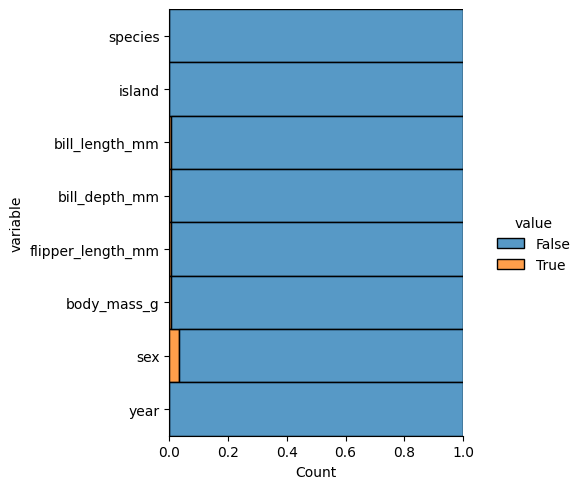

In [17]:
datos.isnull().melt().pipe(lambda df: (sns.displot(data=df, y='variable', hue = 'value', multiple = 'fill')))

## Como visualizamos lo valores nulos?

<AxesSubplot:>

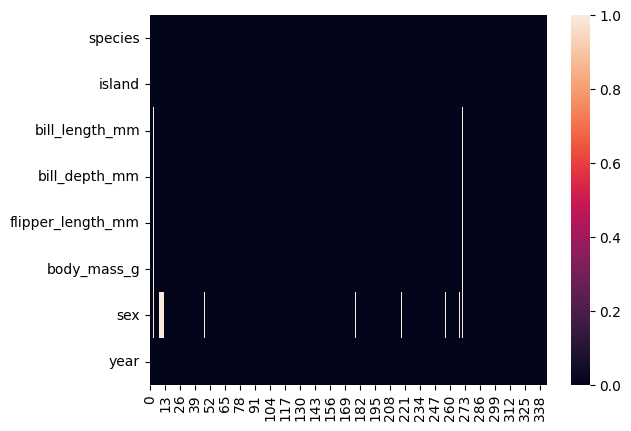

In [19]:
datos.isnull().transpose().pipe(lambda df: (sns.heatmap(data=df)))

 ## Botar los valores nulos

In [20]:
datos.dropna() # isnull funciona igual

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
4       Adelie  Torgersen            36.7           19.3              193.0   
5       Adelie  Torgersen            39.3           20.6              190.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g     sex  year  
0         3750.0    male  2007  
1         3800.0  female  2007  
2         3250.0  female  2007  
4         3450.0  female  2007  
5         3650.0    male  2007  
..           ...     ...   ...  
339       4000.0    male  2009  
340       3400.0  female  2009  
341       3775.0    male  2009  
342       4100.0    male  2009  
343       3775.0  female  2009  

[333 rows x 8 columns]

# Explorando una variable categorica

## Conteos y proporciones

In [22]:
datos.describe()

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
count      342.000000     342.000000         342.000000   342.000000   
mean        43.921930      17.151170         200.915205  4201.754386   
std          5.459584       1.974793          14.061714   801.954536   
min         32.100000      13.100000         172.000000  2700.000000   
25%         39.225000      15.600000         190.000000  3550.000000   
50%         44.450000      17.300000         197.000000  4050.000000   
75%         48.500000      18.700000         213.000000  4750.000000   
max         59.600000      21.500000         231.000000  6300.000000   

              year  
count   344.000000  
mean   2008.029070  
std       0.818356  
min    2007.000000  
25%    2007.000000  
50%    2008.000000  
75%    2009.000000  
max    2009.000000

In [23]:
datos.describe(include = 'all')

species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
count      344     344      342.000000     342.000000         342.000000   
unique       3       3             NaN            NaN                NaN   
top     Adelie  Biscoe             NaN            NaN                NaN   
freq       152     168             NaN            NaN                NaN   
mean       NaN     NaN       43.921930      17.151170         200.915205   
std        NaN     NaN        5.459584       1.974793          14.061714   
min        NaN     NaN       32.100000      13.100000         172.000000   
25%        NaN     NaN       39.225000      15.600000         190.000000   
50%        NaN     NaN       44.450000      17.300000         197.000000   
75%        NaN     NaN       48.500000      18.700000         213.000000   
max        NaN     NaN       59.600000      21.500000         231.000000   

        body_mass_g   sex         year  
count    342.000000   333   344.000000  
unique          NaN     2          NaN  
top             NaN  male          NaN  
freq            NaN   168          NaN  
mean    4201.754386   NaN  2008.029070  
std      801.954536   NaN     0.818356  
min     2700.000000   NaN  2007.000000  
25%     3550.000000   NaN  2007.000000  
50%     4050.000000   NaN  2008.000000  
75%     4750.000000   NaN  2009.000000  
max     6300.000000   NaN  2009.000000

## Describir solo variables numericas

In [27]:
datos.describe(include = [np.number])

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
count      342.000000     342.000000         342.000000   342.000000   
mean        43.921930      17.151170         200.915205  4201.754386   
std          5.459584       1.974793          14.061714   801.954536   
min         32.100000      13.100000         172.000000  2700.000000   
25%         39.225000      15.600000         190.000000  3550.000000   
50%         44.450000      17.300000         197.000000  4050.000000   
75%         48.500000      18.700000         213.000000  4750.000000   
max         59.600000      21.500000         231.000000  6300.000000   

              year  
count   344.000000  
mean   2008.029070  
std       0.818356  
min    2007.000000  
25%    2007.000000  
50%    2008.000000  
75%    2009.000000  
max    2009.000000

## Solo variables categoricas

In [30]:
datos.describe(include = object)

species  island   sex
count      344     344   333
unique       3       3     2
top     Adelie  Biscoe  male
freq       152     168   168

## Solo variables categoricas 2

In [31]:
datos.astype({'species': 'category', 'island': 'category', 'sex': 'category'}).describe()

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
count      342.000000     342.000000         342.000000   342.000000   
mean        43.921930      17.151170         200.915205  4201.754386   
std          5.459584       1.974793          14.061714   801.954536   
min         32.100000      13.100000         172.000000  2700.000000   
25%         39.225000      15.600000         190.000000  3550.000000   
50%         44.450000      17.300000         197.000000  4050.000000   
75%         48.500000      18.700000         213.000000  4750.000000   
max         59.600000      21.500000         231.000000  6300.000000   

              year  
count   344.000000  
mean   2008.029070  
std       0.818356  
min    2007.000000  
25%    2007.000000  
50%    2008.000000  
75%    2009.000000  
max    2009.000000

## Como visualizar los conteos de categorias

<AxesSubplot:>

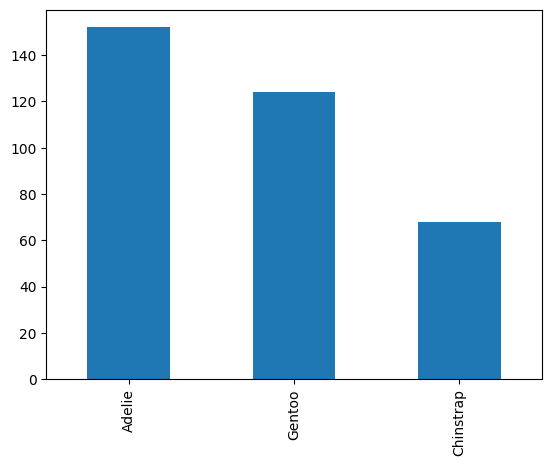

In [32]:
datos.species.value_counts().plot(kind = 'bar')

# Usando Seaborn

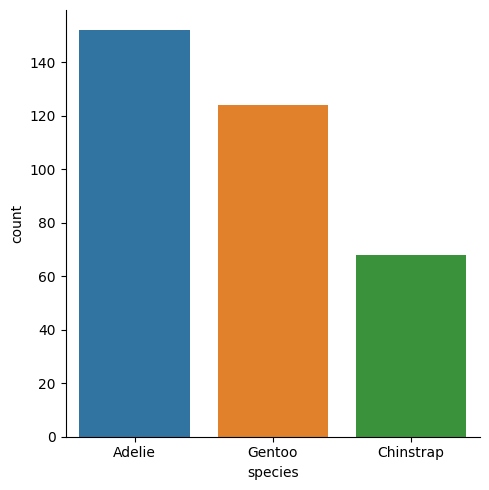

In [33]:
sns.catplot(data = datos, x = 'species', kind = 'count')

## Medidas de tendencia central: Media, mediana, moda

### tambien: media poderada, media harmonica, media geometrica

### MEDIA

In [5]:
# Media para solo un valor
datos.bill_depth_mm.mean()

17.151169590643274

In [7]:
# Con pandas
np.mean(datos.bill_depth_mm)

17.151169590643274

In [8]:
# Para todos los valores
datos.mean()

/tmp/ipykernel_152/3305745435.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  datos.mean()


bill_length_mm         43.921930
bill_depth_mm          17.151170
flipper_length_mm     200.915205
body_mass_g          4201.754386
year                 2008.029070
dtype: float64

### MEDIANA

In [12]:
# Para todos los valores
datos.median()

/tmp/ipykernel_152/1862750922.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  datos.median()


bill_length_mm         44.45
bill_depth_mm          17.30
flipper_length_mm     197.00
body_mass_g          4050.00
year                 2008.00
dtype: float64

### MODA

In [13]:
# Para todos los valores
datos.mode()

species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Biscoe            41.1           17.0              190.0   

   body_mass_g   sex  year  
0       3800.0  male  2009

In [15]:
# Para todas las variables categoricas
datos.describe(include=object)

species  island   sex
count      344     344   333
unique       3       3     2
top     Adelie  Biscoe  male
freq       152     168   168

# Medidas de Dispersion (Rango, Rango intercuartil, Desviacion Estandar)

### Cual es el valor maximo de cada variable? 

In [16]:
datos.max(numeric_only=True)

bill_length_mm         59.6
bill_depth_mm          21.5
flipper_length_mm     231.0
body_mass_g          6300.0
year                 2009.0
dtype: float64

In [ ]:
###

### Cual es el valor minimo de cada variable?

In [32]:
datos.min(numeric_only=True)

bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
year                 2007.0
dtype: float64

### Cual es el rango?

In [18]:
datos.max(numeric_only=True) - datos.min(numeric_only=True)

bill_length_mm         27.5
bill_depth_mm           8.4
flipper_length_mm      59.0
body_mass_g          3600.0
year                    2.0
dtype: float64

### Cual es la desviacion estandar?

In [19]:
datos.std(numeric_only=True)

bill_length_mm         5.459584
bill_depth_mm          1.974793
flipper_length_mm     14.061714
body_mass_g          801.954536
year                   0.818356
dtype: float64

In [20]:
datos.mean(numeric_only=True) + datos.std(numeric_only=True)

bill_length_mm         49.381514
bill_depth_mm          19.125963
flipper_length_mm     214.976918
body_mass_g          5003.708922
year                 2008.847426
dtype: float64

### Cual es el rango intercuartil?

In [23]:
datos.quantile(0.50) # esto es equivalente a la mediana

bill_length_mm         44.45
bill_depth_mm          17.30
flipper_length_mm     197.00
body_mass_g          4050.00
year                 2008.00
Name: 0.5, dtype: float64

#### El rango intercaurtil es:

In [31]:
datos.quantile(0.75) - datos.quantile(0.25) 

bill_length_mm          9.275
bill_depth_mm           3.100
flipper_length_mm      23.000
body_mass_g          1200.000
year                    2.000
dtype: float64

### Visualizar la distribucion de una variable con histgrama

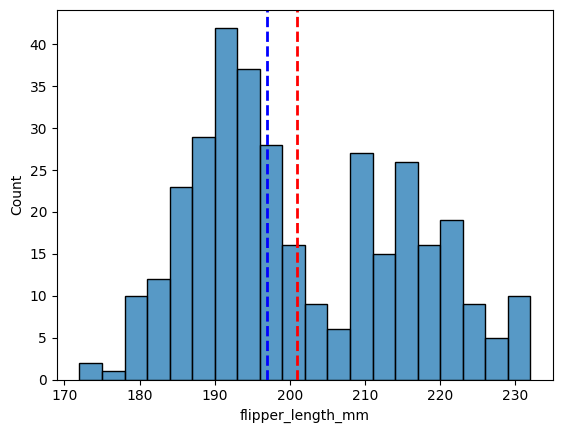

In [48]:
sns.histplot(data = datos, x = 'flipper_length_mm', binwidth=3)

plt.axvline(x = datos.flipper_length_mm.mean(), color = 'red', linestyle = 'dashed', linewidth = 2)
plt.axvline(x = datos.flipper_length_mm.median(), color = 'blue', linestyle = 'dashed', linewidth = 2)
#plt.axvline(x = datos.flipper_length_mm.mode(), color = 'green', linestyle = 'dashed', linewidth = 2)

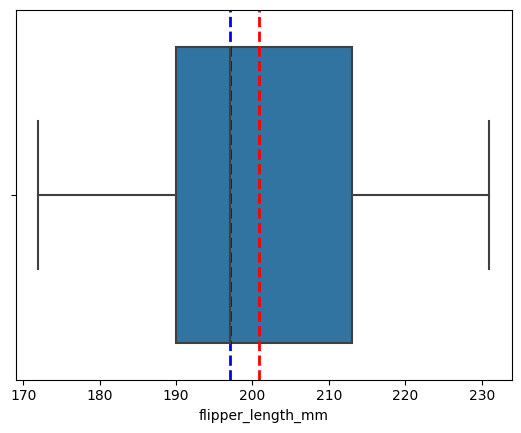

In [44]:
sns.boxplot(data = datos, x = 'flipper_length_mm')
plt.axvline(x = datos.flipper_length_mm.mean(), color = 'red', linestyle = 'dashed', linewidth = 2)
plt.axvline(x = datos.flipper_length_mm.median(), color = 'blue', linestyle = 'dashed', linewidth = 2)


# Distribuciones: PMF, CDF y PDF

## PMF: Funcion de probabilidad de masas

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Probability'>

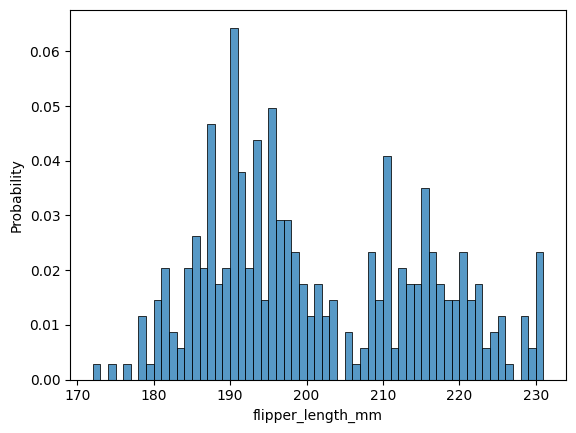

In [52]:
## Usando seaborn

sns.histplot(data = datos, x = 'flipper_length_mm',
            binwidth=1,
            stat = 'probability')


### usando epiricaldist

In [54]:
# !pip install empiricaldist

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py) ... done
  Created wheel for empiricaldist: filename=empiricaldist-0.6.7-py3-none-any.whl size=11958 sha256=f1f7af60729ee44588ad7693d2caad6f20f0714dbcfe8432803441d441621651
  Stored in directory: /home/luiscantero/.cache/pip/wheels/f8/17/1e/d9e896722333dd7f16f1bc40387c4b803e6631c968f262e4ef
Successfully built empiricaldist


In [59]:
pmf_empi = empiricaldist.Pmf.from_seq(datos.flipper_length_mm, normalize = True)

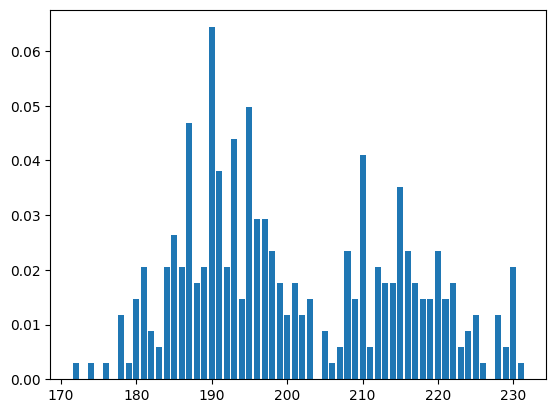

In [60]:
pmf_empi.bar()

In [62]:
pmf_empi(190) #prababilidad de encontrar este valor

0.06432748538011696

## ECDF : funcion de probabilidad acumulada

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Proportion'>

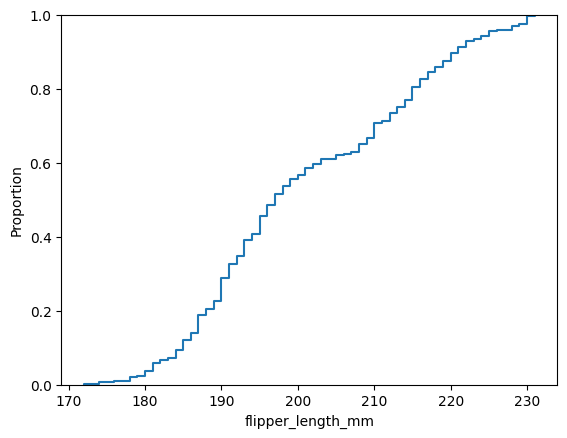

In [63]:
sns.ecdfplot(data = datos, x = 'flipper_length_mm')

### usando epiricaldist

In [65]:
cdf_empi = empiricaldist.Cdf.from_seq(datos.flipper_length_mm, normalize = True)

<AxesSubplot:>

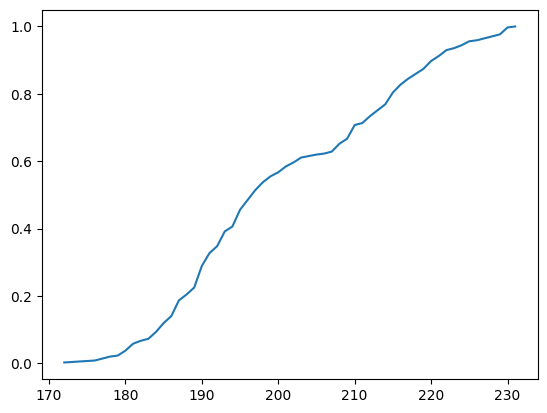

In [66]:
cdf_empi.plot()

## Comparando distribuciones

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Proportion'>

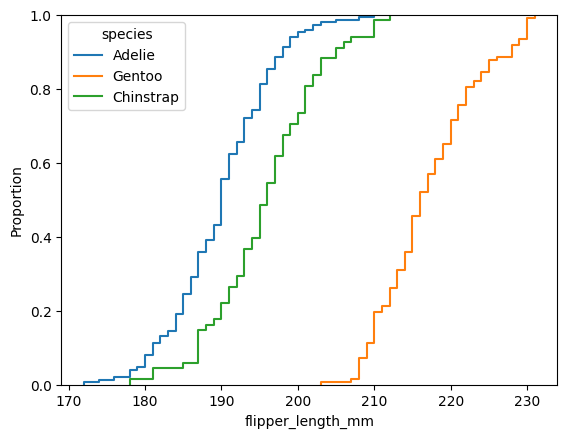

In [67]:
sns.ecdfplot(data = datos, x = 'flipper_length_mm', hue = 'species')

# Funciones de densidad de probabilidad

### Probabilidad de que los datos tengan el valor indicado en la grafica siguiente


<AxesSubplot:xlabel='flipper_length_mm', ylabel='Density'>

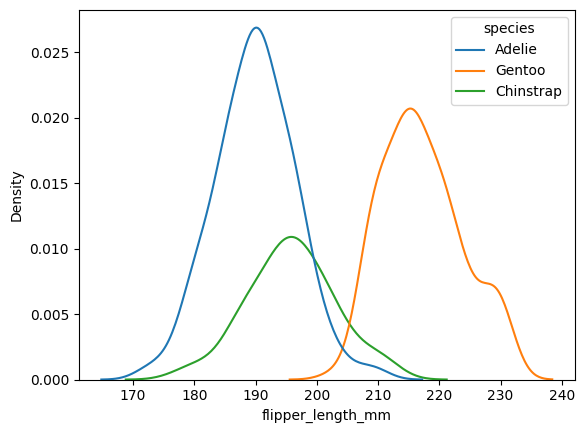

In [69]:
sns.kdeplot(data = datos, x = 'flipper_length_mm', hue = 'species')

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Density'>

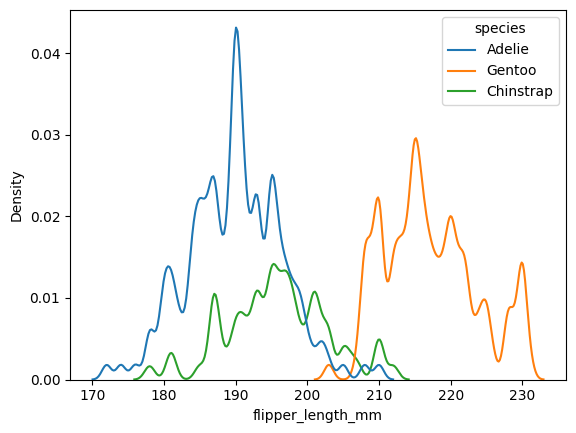

In [70]:
sns.kdeplot(data = datos, x = 'flipper_length_mm', hue = 'species', bw_method=0.1)

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Density'>

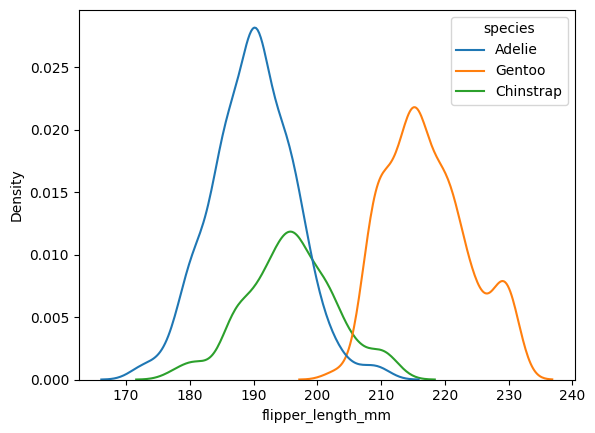

In [71]:
sns.kdeplot(data = datos, x = 'flipper_length_mm', hue = 'species', bw_method=0.3)

<AxesSubplot:xlabel='body_mass_g', ylabel='Density'>

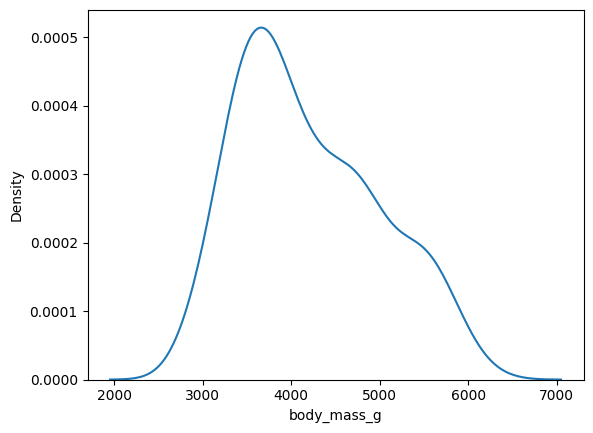

In [72]:
sns.kdeplot(data = datos, x = 'body_mass_g')

# Ley de los grandes numeros y teorema del limite central

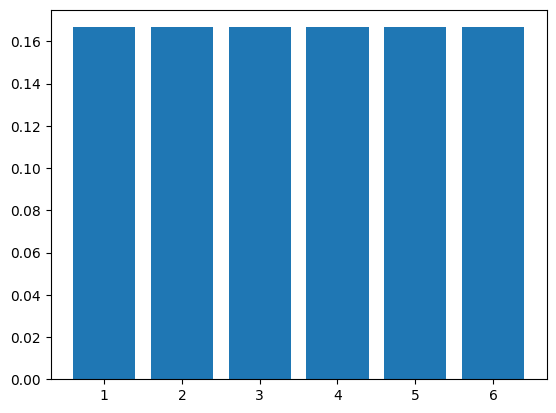

In [75]:
dice = empiricaldist.Pmf.from_seq([1, 2, 3, 4, 5, 6])
dice.bar()

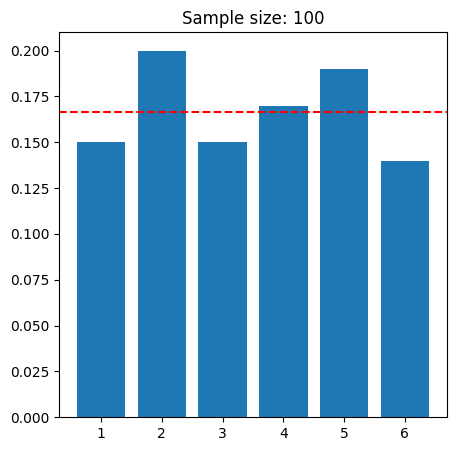

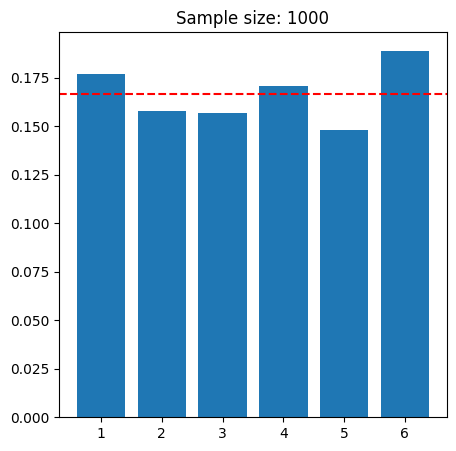

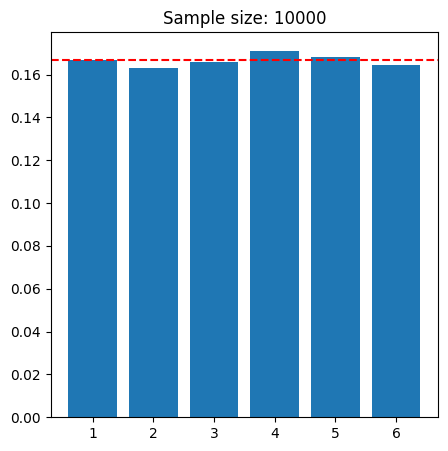

In [78]:
for sample_size in (1e2, 1e3, 1e4):
    sample_size = int(sample_size)
    values = dice.sample(sample_size)
    sample_pmf = empiricaldist.Pmf.from_seq(values)
    
    plt.figure(figsize=(5, 5))
    sample_pmf.bar()
    plt.axhline(y=1/6, color = 'red', linestyle = 'dashed') 
    plt.title(f"Sample size: {sample_size}")

### Teorema del limite central

In [80]:
datos.sex.value_counts(normalize=True)

male      0.504505
female    0.495495
Name: sex, dtype: float64

In [81]:
sex_numeric = datos.sex.replace(['male', 'female'], [1,0])

In [82]:
number_samples = 1000
sample_size = 35

samples_df = pd.DataFrame()

np.random.seed(42)
for i in range(1, number_samples + 1):
    sex_numeric_sample = sex_numeric.sample(sample_size, replace=True).to_numpy()
    sample_name = f"sample_{i}"
    samples_df[sample_name] = sex_numeric_sample


male_population_mean = samples_df.mean().mean()
print(f"Estimated percentage of male penguins in population is: {male_population_mean * 100:.4f}%")

/tmp/ipykernel_152/2100621360.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  samples_df[sample_name] = sex_numeric_sample


Estimated percentage of male penguins in population is: 50.5906%


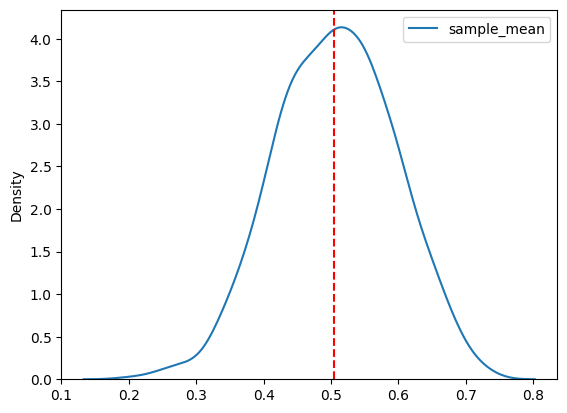

In [83]:
sample_means_binomial = pd.DataFrame(samples_df.mean(), columns=['sample_mean'])
sns.kdeplot(data=sample_means_binomial)
plt.axvline(x=sex_numeric.mean(), color='red', linestyle='dashed')

In [84]:
sample_size_experiment = pd.DataFrame(
    [[i, samples_df.iloc[:, 0:i].mean().mean().mean()] for i in range(1, number_samples + 1)],
    columns=['sample_size', 'estimated_mean']
)

(0.30450450450450445, 0.7045045045045044)

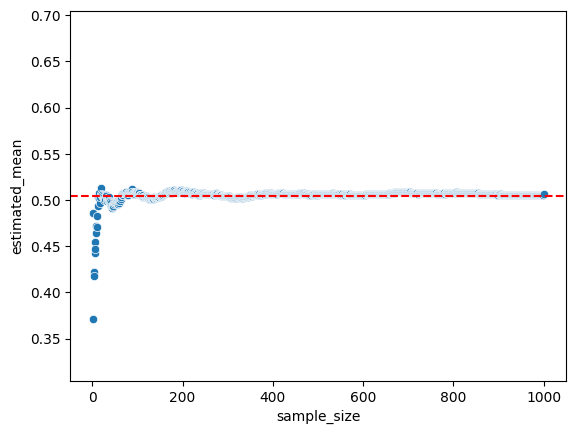

In [85]:
sns.scatterplot(
    data=sample_size_experiment,
    x='sample_size',
    y='estimated_mean'
)

plt.axhline(
    y=sex_numeric.mean(),
    color='red',
    linestyle='dashed'
)

plt.ylim([sex_numeric.mean() - 0.20, sex_numeric.mean() + 0.20])

# Estableciendo relaciones: graficos de puntos

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

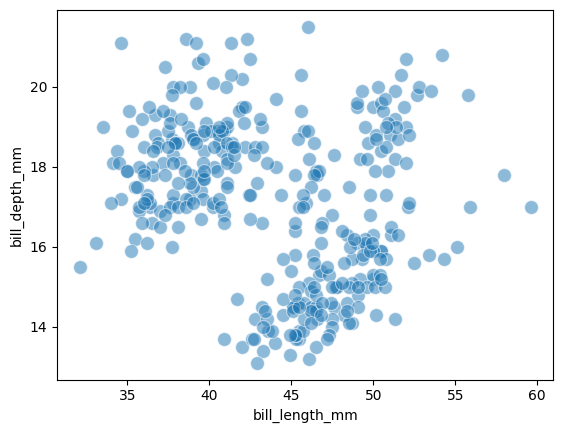

In [91]:
sns.scatterplot(data=datos, x = 'bill_length_mm', y = 'bill_depth_mm', alpha =1/2,
               s = 100)

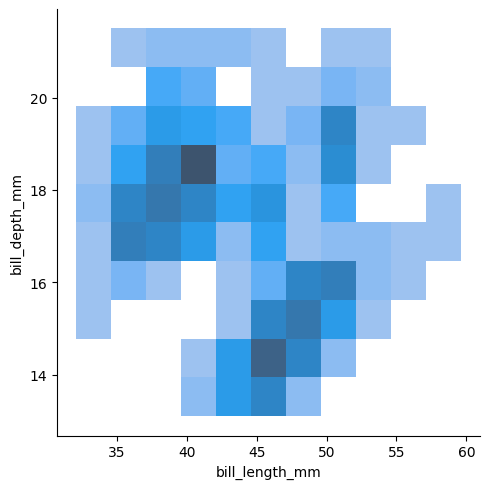

In [94]:
sns.displot(data=datos, x = 'bill_length_mm', y = 'bill_depth_mm')

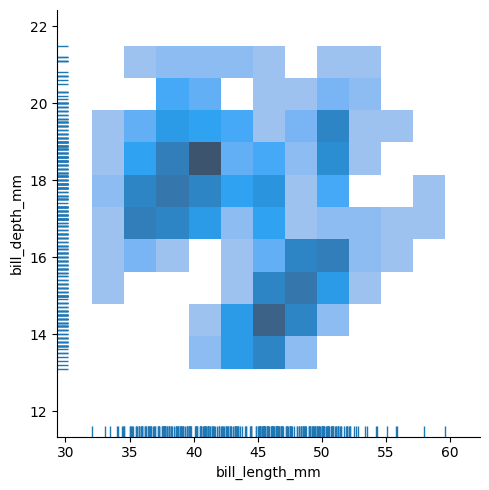

In [95]:
sns.displot(data=datos, x = 'bill_length_mm', y = 'bill_depth_mm', rug = True)

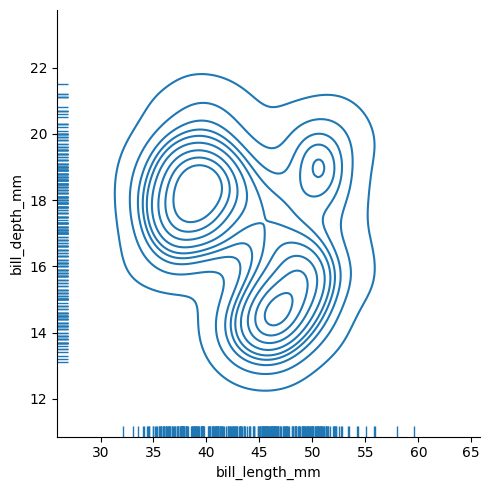

In [97]:
sns.displot(data=datos, x = 'bill_length_mm', y = 'bill_depth_mm', rug = True, kind = 'kde')

/home/luiscantero/.local/lib/python3.8/site-packages/seaborn/distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'rug'
  cset = contour_func(


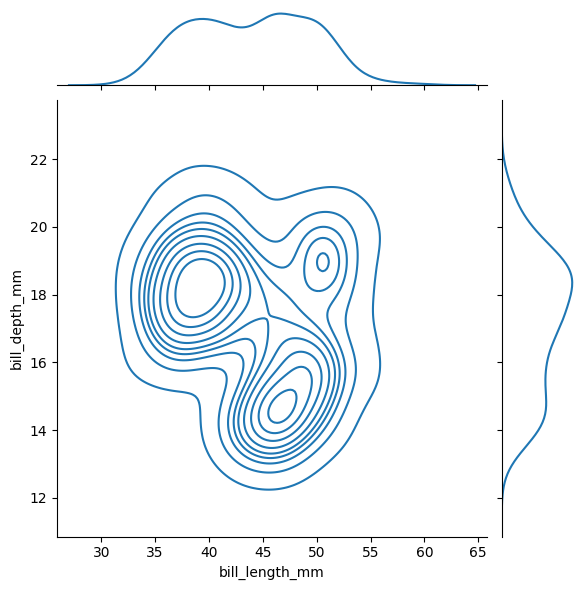

In [101]:
sns.jointplot(data=datos, x = 'bill_length_mm', y = 'bill_depth_mm', rug = True, kind = 'kde')

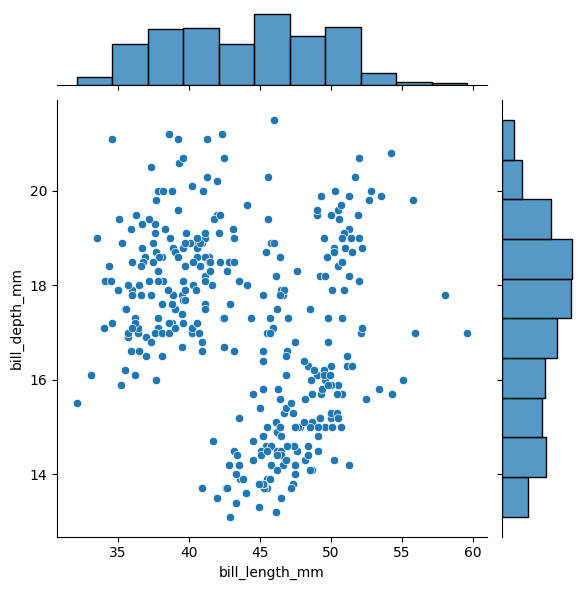

In [104]:
sns.jointplot(data=datos, x = 'bill_length_mm', y = 'bill_depth_mm')

# Graficos de violin y boxplots

## Usando variables categoricas:

<AxesSubplot:xlabel='species', ylabel='flipper_length_mm'>

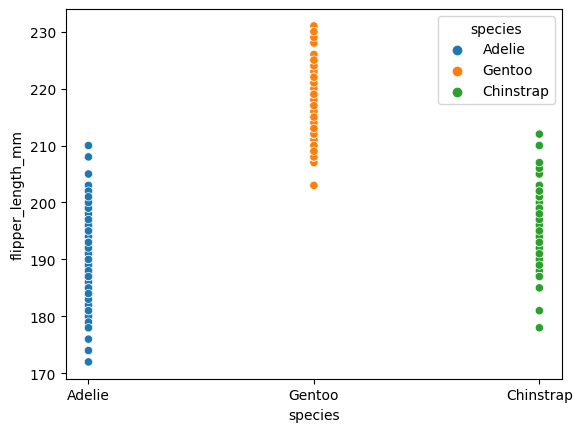

In [116]:
sns.scatterplot(data =datos,
               x = 'species',
                y= 'flipper_length_mm',
                hue = 'species'
               )

<AxesSubplot:xlabel='species', ylabel='flipper_length_mm'>

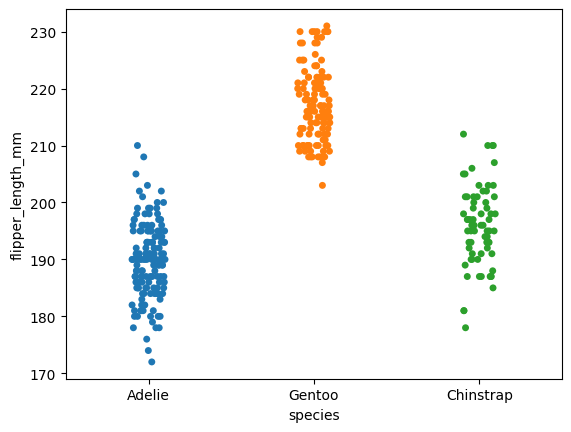

In [115]:
# MAs informacion de como se acumulan estos datos

sns.stripplot(data =datos,
               x = 'species',
                y= 'flipper_length_mm',
               )

<AxesSubplot:xlabel='flipper_length_mm', ylabel='species'>

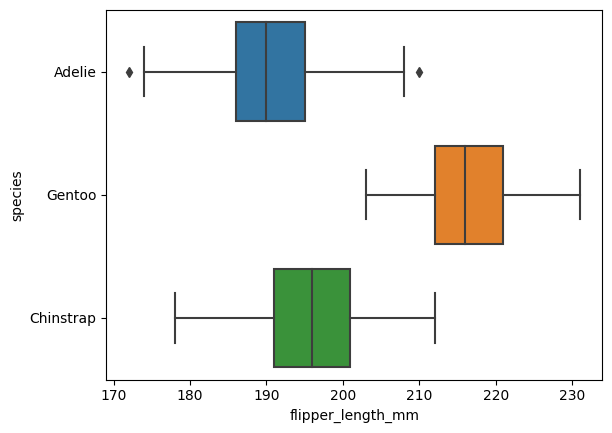

In [118]:
sns.boxplot(data =datos,
               y = 'species',
                x= 'flipper_length_mm',
               )

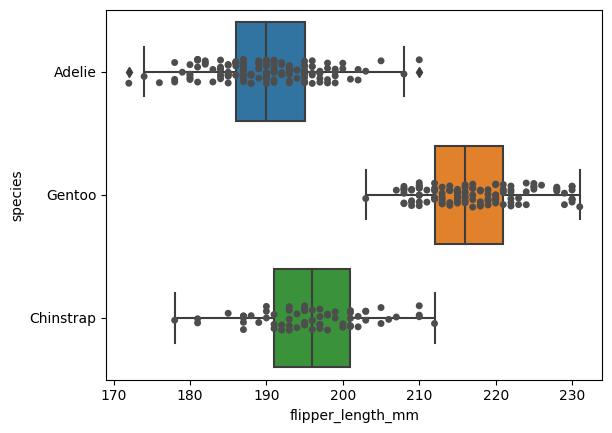

In [120]:
# mejorando la presentacion
ax = sns.boxplot(data =datos,
               y = 'species',
                x= 'flipper_length_mm',
               )

ax = sns.stripplot(data =datos,
               y = 'species',
                x= 'flipper_length_mm',
                   color='0.3'
               )


### usando la grafica del violin

Podemos ver las distribuciones entre los parametros indicados

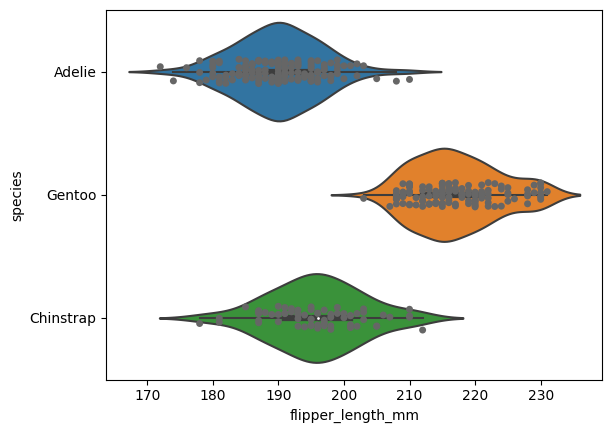

In [124]:
# mejorando la presentacion
ax = sns.violinplot(data =datos,
               y = 'species',
                x= 'flipper_length_mm',
               )

ax = sns.stripplot(data =datos,
               y = 'species',
                x= 'flipper_length_mm',
                   color='0.4'
               )

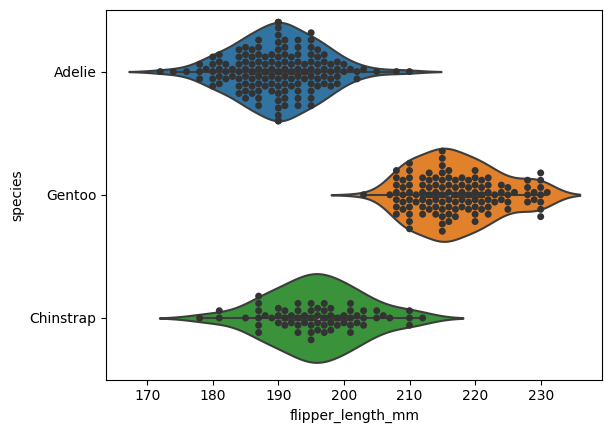

In [126]:
# mejorando la presentacion
ax = sns.violinplot(data =datos,
               y = 'species',
                x= 'flipper_length_mm',
               )

ax = sns.swarmplot(data =datos,
               y = 'species',
                x= 'flipper_length_mm',
                   color='0.2'
               )

# Matrices de correlacion

### Que tanto estan relacionadas las variables? Usamos un coeficiente de correlacion

## Existe alguna correlacion entre algunas de nuestras variables?

In [129]:
datos.corr().style.highlight_between(left=1.0, right=1.0,color='lightgreen')

## Como puedo visualizar los coeficientes de correlacion?

<AxesSubplot:>

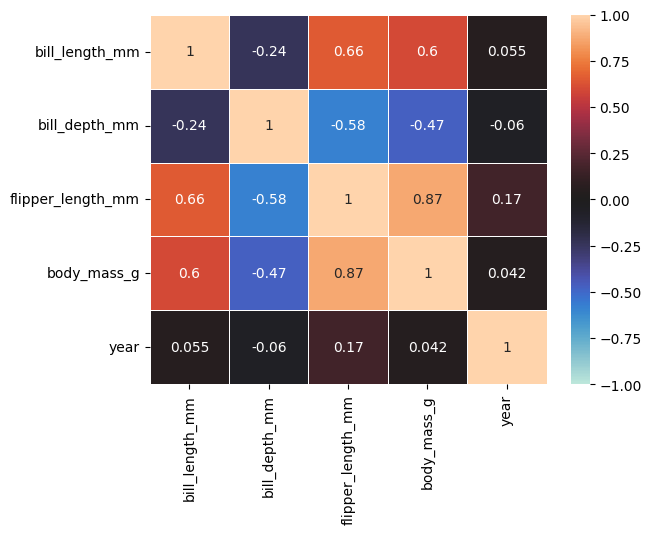

In [132]:
sns.heatmap(data = datos.corr(),
           center=0,
           vmin = -1.0,
           vmax = 1.0,
           linewidth = 0.5,
           annot = True)

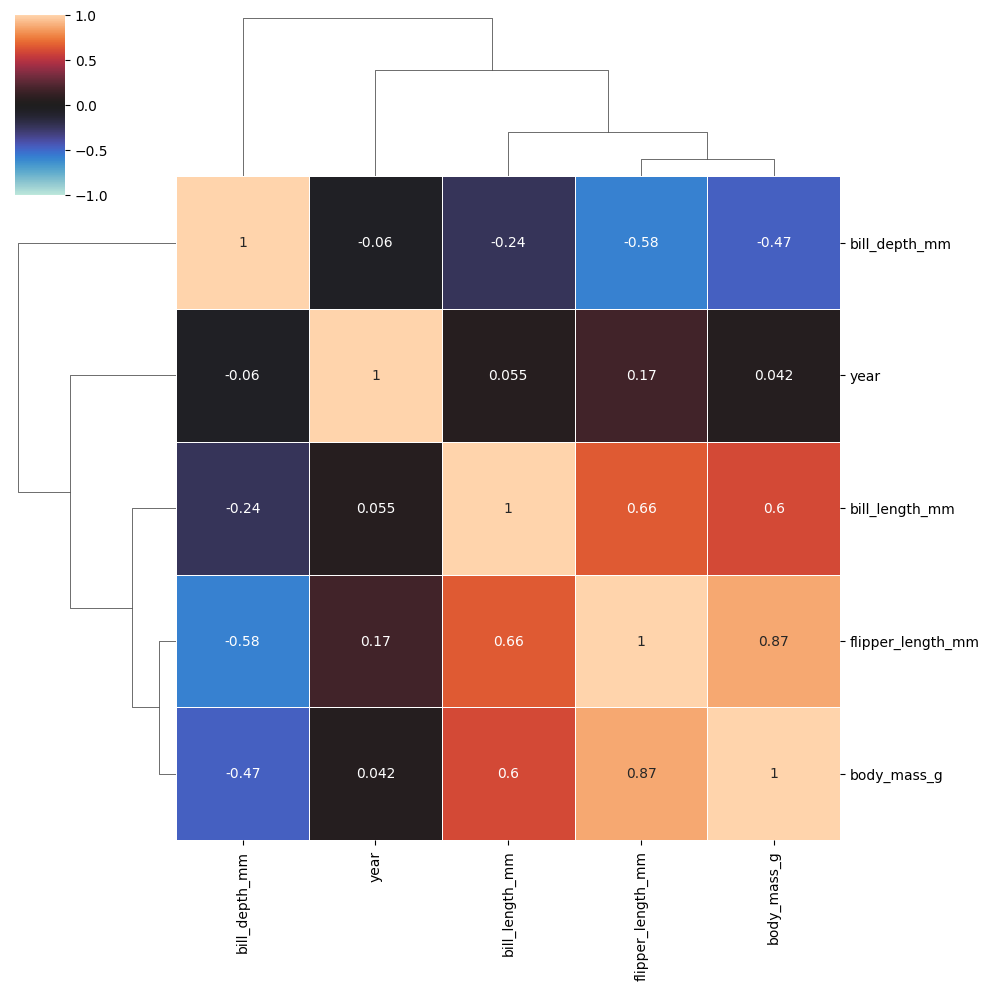

In [133]:
sns.clustermap(data = datos.corr(),
           center=0,
           vmin = -1.0,
           vmax = 1.0,
           linewidth = 0.5,
           annot = True)

## Como representar una variable categorica como numerica discreta?

In [135]:
datos = datos.assign(
    numeric_sex = lambda df :df.sex.replace(['female', 'male'], [0, 1])
)

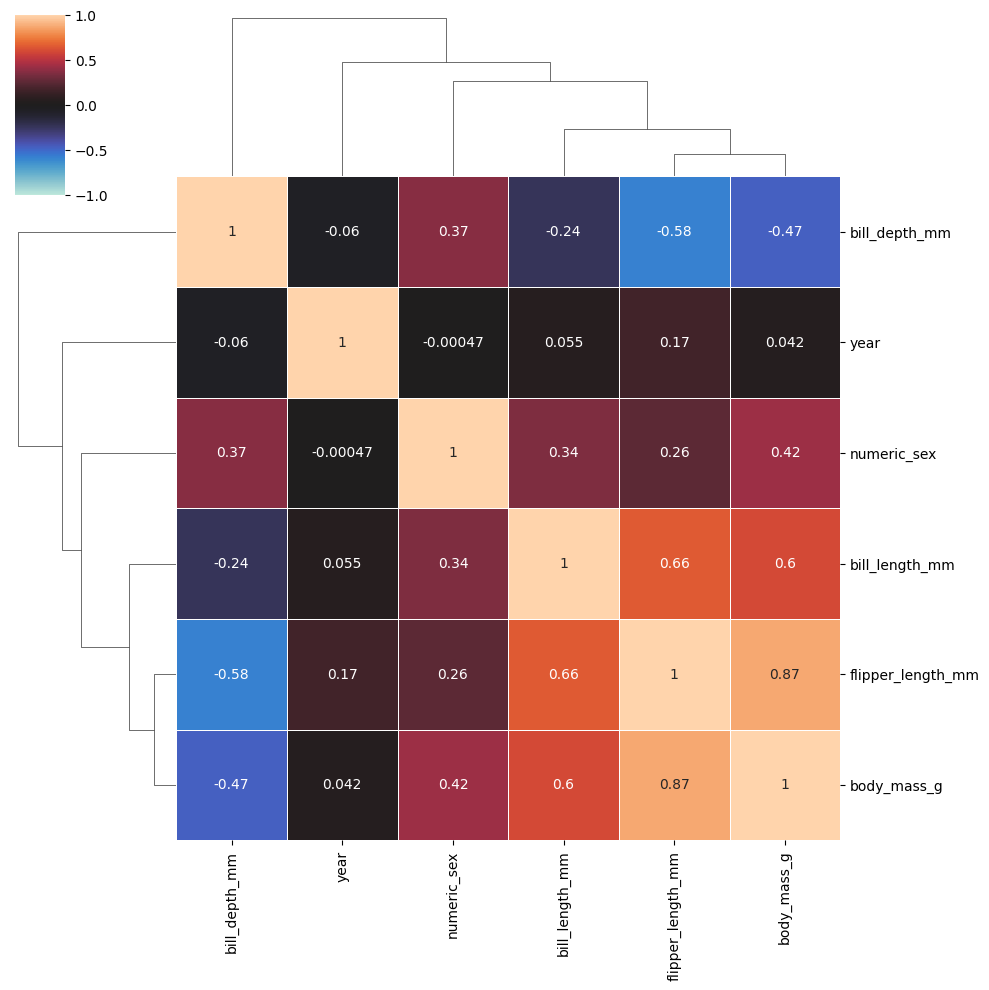

In [136]:
sns.clustermap(data = datos.corr(),
           center=0,
           vmin = -1.0,
           vmax = 1.0,
           linewidth = 0.5,
           annot = True)

# NOTA: ESTO SOLO ES CORRELACION LINEAL

# ESTE METODO TIENE ESTA LIMITACION. 

# DEPENDE DE LA RELACION ENTRE LOS DATOS PODRIAMOS TENER MALINTERPRETACIONES DEL COEFICIENTE DE CORRELACION

# EJEMPLO

[[1.         0.92761617]
 [0.92761617 1.        ]]
[[1.         0.67476343]
 [0.67476343 1.        ]]


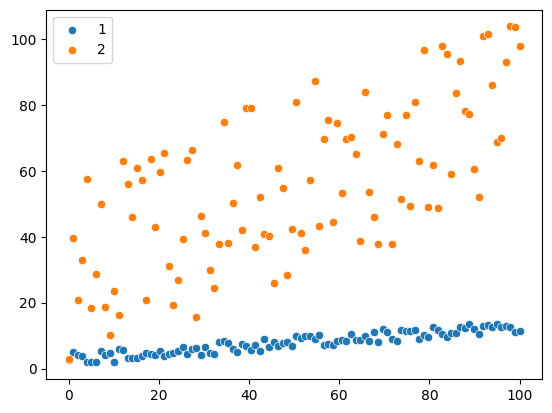

In [137]:
np.random.seed(42)
x1 = np.linspace(0,100,100)
y1 = 0.1* x1 +3 + np.random.uniform(-2,2,size=x1.size)

sns.scatterplot(x=x1, y=y1)


x2 = np.linspace(0,100,100)
y2 = 0.5* x1 +1 + np.random.uniform(0,60,size=x2.size)

sns.scatterplot(x=x2, y=y2)

plt.legend(["1","2"])

print(np.corrcoef(x1,y1))
print(np.corrcoef(x2,y2))

### Para medir cual conjunto de datos tiene mas correlacion, podemos obtener sus parametros de pendiente y bias usando una regresion lineal simple:

In [146]:
parametros = scipy.stats.linregress(
    x = x1,
    y = y1
)

parametros

LinregressResult(slope=0.10081969280979615, intercept=2.8397383330230292, rvalue=0.9276161661149585, pvalue=1.0607043467839354e-43, stderr=0.004101050284084736, intercept_stderr=0.2373714102742458)

In [149]:
parametros = scipy.stats.linregress(
    x = x2,
    y = y2
)
parametros

LinregressResult(slope=0.5470008424819226, intercept=28.519861265205236, rvalue=0.6747634267657527, pvalue=1.388369987899253e-14, stderr=0.06043657503136455, intercept_stderr=3.498107570885824)

### Alternativa (Pero no podemos ver los parametros caracteristicos de cada linea)

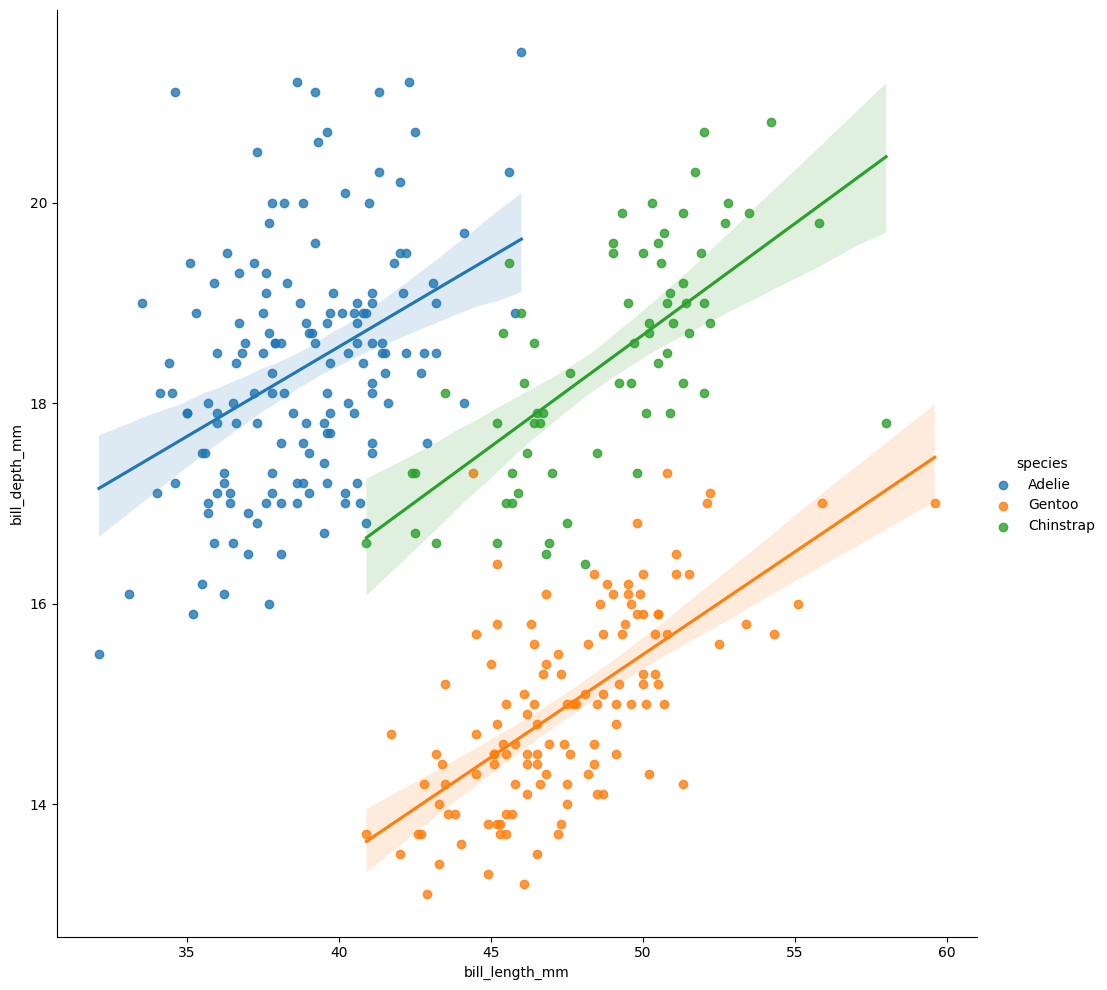

In [142]:


sns.lmplot(
    data=datos,
    x='bill_length_mm',
    y='bill_depth_mm',
    height=10,
    hue='species'
)

# Analisis de regresion multiple (mas de dos variables a la vez)

## Tambien permite analisis de orden superior, no solo lineal

### Creando modelos

## modelo 1

In [178]:
model_1 = (smf.ols(formula = 'body_mass_g ~ bill_length_mm',
       data = datos
       ).fit())

model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     186.4
Date:                Thu, 05 Jan 2023   Prob (F-statistic):           3.81e-34
Time:                        18:24:20   Log-Likelihood:                -2697.0
No. Observations:                 342   AIC:                             5398.
Df Residuals:                     340   BIC:                             5406.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        362.3067    283.345      1.279      0.202    -195.024     919.637
bill_length_mm    87.4153      6.402     13.654      0.000      74.823     100.008
==============================================================================
Omnibus:                        5.671   Durbin-Watson:                   0.866
Prob(Omnibus):                  0.059   Jarque-Bera (JB):                4.857
Skew:                          -0.211   Prob(JB):                       0.0882
Kurtosis:                       2.597   Cond. No.                         359.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Modelo 2 (agregando una variable extra)

### NOTA: Los coeficientes entre las variables van cambiando

In [179]:
model_2 = (smf.ols(formula = 'body_mass_g ~ bill_length_mm + bill_depth_mm',
       data = datos
       ).fit())

model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     150.8
Date:                Thu, 05 Jan 2023   Prob (F-statistic):           1.40e-47
Time:                        18:24:20   Log-Likelihood:                -2662.9
No. Observations:                 342   AIC:                             5332.
Df Residuals:                     339   BIC:                             5343.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3343.1359    429.912      7.776      0.000    2497.504    4188.768
bill_length_mm    75.2808      5.971     12.608      0.000      63.537      87.025
bill_depth_mm   -142.7226     16.507     -8.646      0.000    -175.191    -110.254
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.817
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                2.019
Skew:                           0.001   Prob(JB):                        0.364
Kurtosis:                       2.624   Cond. No.                         645.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Modelo 3

### NOTA: Los coeficientes entre las variables van cambiando

In [180]:
model_3 = (smf.ols(formula = 'body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm',
       data = datos
       ).fit())

model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     359.7
Date:                Thu, 05 Jan 2023   Prob (F-statistic):          8.19e-105
Time:                        18:24:21   Log-Likelihood:                -2526.7
No. Observations:                 342   AIC:                             5061.
Df Residuals:                     338   BIC:                             5077.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -6424.7647    561.469    -11.443      0.000   -7529.179   -5320.351
bill_length_mm        4.1618      5.329      0.781      0.435      -6.321      14.644
bill_depth_mm        20.0495     13.694      1.464      0.144      -6.887      46.986
flipper_length_mm    50.2692      2.477     20.293      0.000      45.397      55.142
==============================================================================
Omnibus:                        5.263   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.072   Jarque-Bera (JB):                5.129
Skew:                           0.298   Prob(JB):                       0.0770
Kurtosis:                       3.065   Cond. No.                     5.46e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Modelo 4 (Agregamos una variable categorica)

### Para agregar una variable categorica agregamos C()

In [181]:
model_4 = (smf.ols(formula = 'body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm + C(sex)',
       data = datos
       ).fit())

model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     381.3
Date:                Thu, 05 Jan 2023   Prob (F-statistic):          6.28e-122
Time:                        18:24:21   Log-Likelihood:                -2411.8
No. Observations:                 333   AIC:                             4834.
Df Residuals:                     328   BIC:                             4853.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2288.4650    631.580     -3.623      0.000   -3530.924   -1046.006
C(sex)[T.male]      541.0285     51.710     10.463      0.000     439.304     642.753
bill_length_mm       -2.3287      4.684     -0.497      0.619     -11.544       6.886
bill_depth_mm       -86.0882     15.570     -5.529      0.000    -116.718     -55.459
flipper_length_mm    38.8258      2.448     15.862      0.000      34.011      43.641
==============================================================================
Omnibus:                        2.598   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.273   Jarque-Bera (JB):                2.125
Skew:                           0.062   Prob(JB):                        0.346
Kurtosis:                       2.629   Cond. No.                     7.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Modelo 5

In [182]:
model_5 = (smf.ols(formula = 'body_mass_g ~ flipper_length_mm + C(sex)',
       data = datos
       ).fit())

model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     684.8
Date:                Thu, 05 Jan 2023   Prob (F-statistic):          3.53e-118
Time:                        18:24:22   Log-Likelihood:                -2427.2
No. Observations:                 333   AIC:                             4860.
Df Residuals:                     330   BIC:                             4872.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5410.3002    285.798    -18.931      0.000   -5972.515   -4848.085
C(sex)[T.male]      347.8503     40.342      8.623      0.000     268.491     427.209
flipper_length_mm    46.9822      1.441     32.598      0.000      44.147      49.817
==============================================================================
Omnibus:                        0.262   Durbin-Watson:                   1.710
Prob(Omnibus):                  0.877   Jarque-Bera (JB):                0.376
Skew:                           0.051   Prob(JB):                        0.829
Kurtosis:                       2.870   Cond. No.                     2.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Visualizacion del analisis de regresion multiple

In [203]:
models_results = pd.DataFrame(
    dict(
        #actual_value = datos.body_mass_g,
        prdediction_model_1 = model_1.predict(),
        prdediction_model_2 = model_2.predict(),
        prdediction_model_3 = model_3.predict(),
        #prdediction_model_4 = model_4.predict(),
        #prdediction_model_5 = model_5.predict(),
        #species = datos.species,
        #sex = datos.sex
    )
)

models_results

prdediction_model_1  prdediction_model_2  prdediction_model_3
0            3780.244054          3617.702412          3211.617868
1            3815.210165          3833.354170          3438.564312
2            3885.142387          3807.945238          3906.346483
3            3570.447389          3351.394871          3816.889879
4            3797.727110          3361.585558          3702.967340
..                   ...                  ...                  ...
337          5240.079181          4717.897124          4610.174519
338          4164.871273          4034.571584          4273.553813
339          4698.104463          4479.512293          3848.522876
340          4803.002796          4455.671160          4724.133455
341          4750.553630          4453.319462          4112.390843

[342 rows x 3 columns]

## ECDF

<AxesSubplot:ylabel='Proportion'>

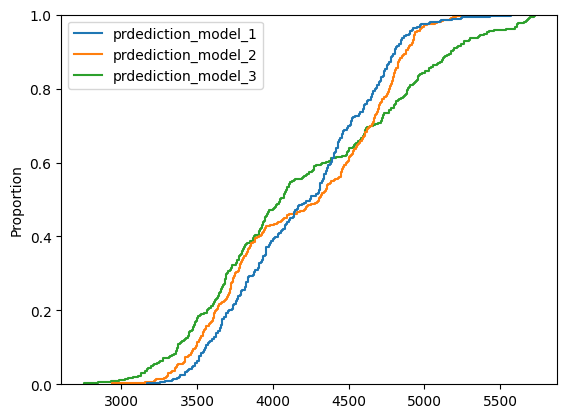

In [210]:
sns.ecdfplot(
    
    data = models_results

)

## PDFs

<AxesSubplot:ylabel='Density'>

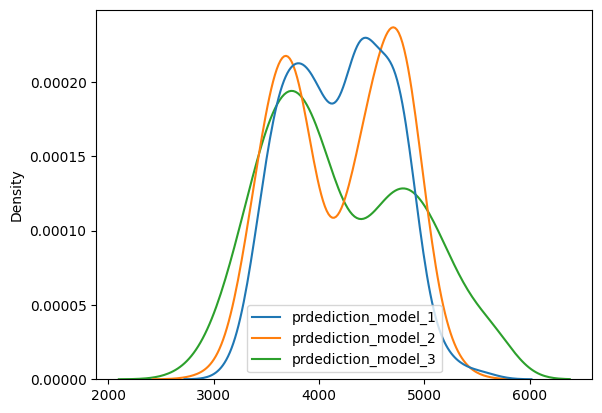

In [211]:
sns.kdeplot(
    
    data = models_results

)

<AxesSubplot:ylabel='Density'>

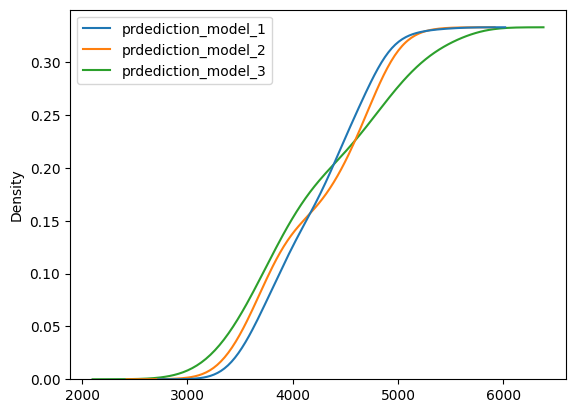

In [212]:
sns.kdeplot(
    
    data = models_results,
    cumulative = True

)

## Que pudimos haber encontrado antes de hacer los modelos?

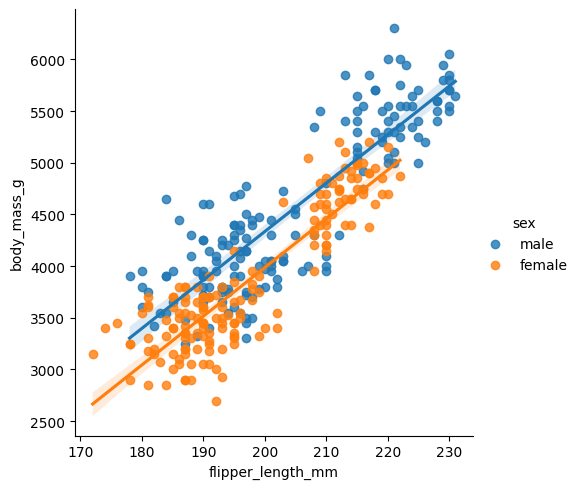

In [215]:
sns.lmplot(
    data = datos,
    x = 'flipper_length_mm',
    y = 'body_mass_g',
    hue = 'sex')

# Analisis de regresion logistica

## Podemos crear un modelo para predecir si es macho o hembra?

In [219]:
smf.logit(
formula = 'numeric_sex ~ flipper_length_mm + bill_length_mm + bill_depth_mm + C(island)',
data = datos).fit().summary()

## Notense las variables categoricas y numericas


# nota: el sexo macho es 1. En Coef, los valores mas similares a 1 son los que predicen que si es macho

Optimization terminated successfully.
         Current function value: 0.360900
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            numeric_sex   No. Observations:                  333
Model:                          Logit   Df Residuals:                      327
Method:                           MLE   Df Model:                            5
Date:                Thu, 05 Jan 2023   Pseudo R-squ.:                  0.4793
Time:                        18:41:27   Log-Likelihood:                -120.18
converged:                       True   LL-Null:                       -230.80
Covariance Type:            nonrobust   LLR p-value:                 8.021e-46
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -61.4464      6.944     -8.849      0.000     -75.057     -47.836
C(island)[T.Dream]        -1.5596      0.493     -3.163      0.002      -2.526      -0.593
C(island)[T.Torgersen]    -1.0323      0.599     -1.725      0.085      -2.205       0.141
flipper_length_mm          0.1393      0.024      5.874      0.000       0.093       0.186
bill_length_mm             0.1413      0.045      3.150      0.002       0.053       0.229
bill_depth_mm              1.6401      0.185      8.864      0.000       1.277       2.003
==========================================================================================
"""

## Podemos crear un modelo para predecir si un pinguino es de cierta especie?

In [220]:
datos.species.unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [221]:
datos = (
    datos
    .assign(is_adelie=lambda df: df.species.replace(['Adelie', 'Gentoo', 'Chinstrap'], [1,0,0]))
)

In [226]:
#Modelo para determinar si un pinguino es adelie segun su sexo y el largo de las aletas
model_is_adele = smf.logit(
    formula='is_adelie ~ flipper_length_mm + C(sex)',
    data=datos).fit()

Optimization terminated successfully.
         Current function value: 0.355225
         Iterations 8


In [225]:
# En cuanto al sexo como el valor es similar a 1, es mas probable que un pinguino  de esta isla sea macho,
# Tambien es menos pobable que el ala tanga un vlor grande por el valor negativo obtenido

model_is_adele.params

Intercept            40.568368
C(sex)[T.male]        1.282656
flipper_length_mm    -0.209705
dtype: float64

In [229]:
is_adelie_df_prediction = pd.DataFrame(
    dict(
        actual_adelie = datos.is_adelie,
        predicted_values = model_is_adele.predict().round()  #round indica solo si es cero o uno
    )
)

is_adelie_df_prediction

ValueError: array length 333 does not match index length 344

# Paradoja de Simpson

Fenomeno en el cual es posible concluir dos cosas totalmente opuestas a partir de los mismos datos, dependiendo el como se clasifican estos


Visualiza siempre los datos para tener una mejor idea de las variables que estan relacionadas.


Utiliza pairplot de la libreria Seaborn para obtener un resumen visual de las graficas de par de variables y tener una idea desde el inicio de la EDA sobre la relacion de las variables

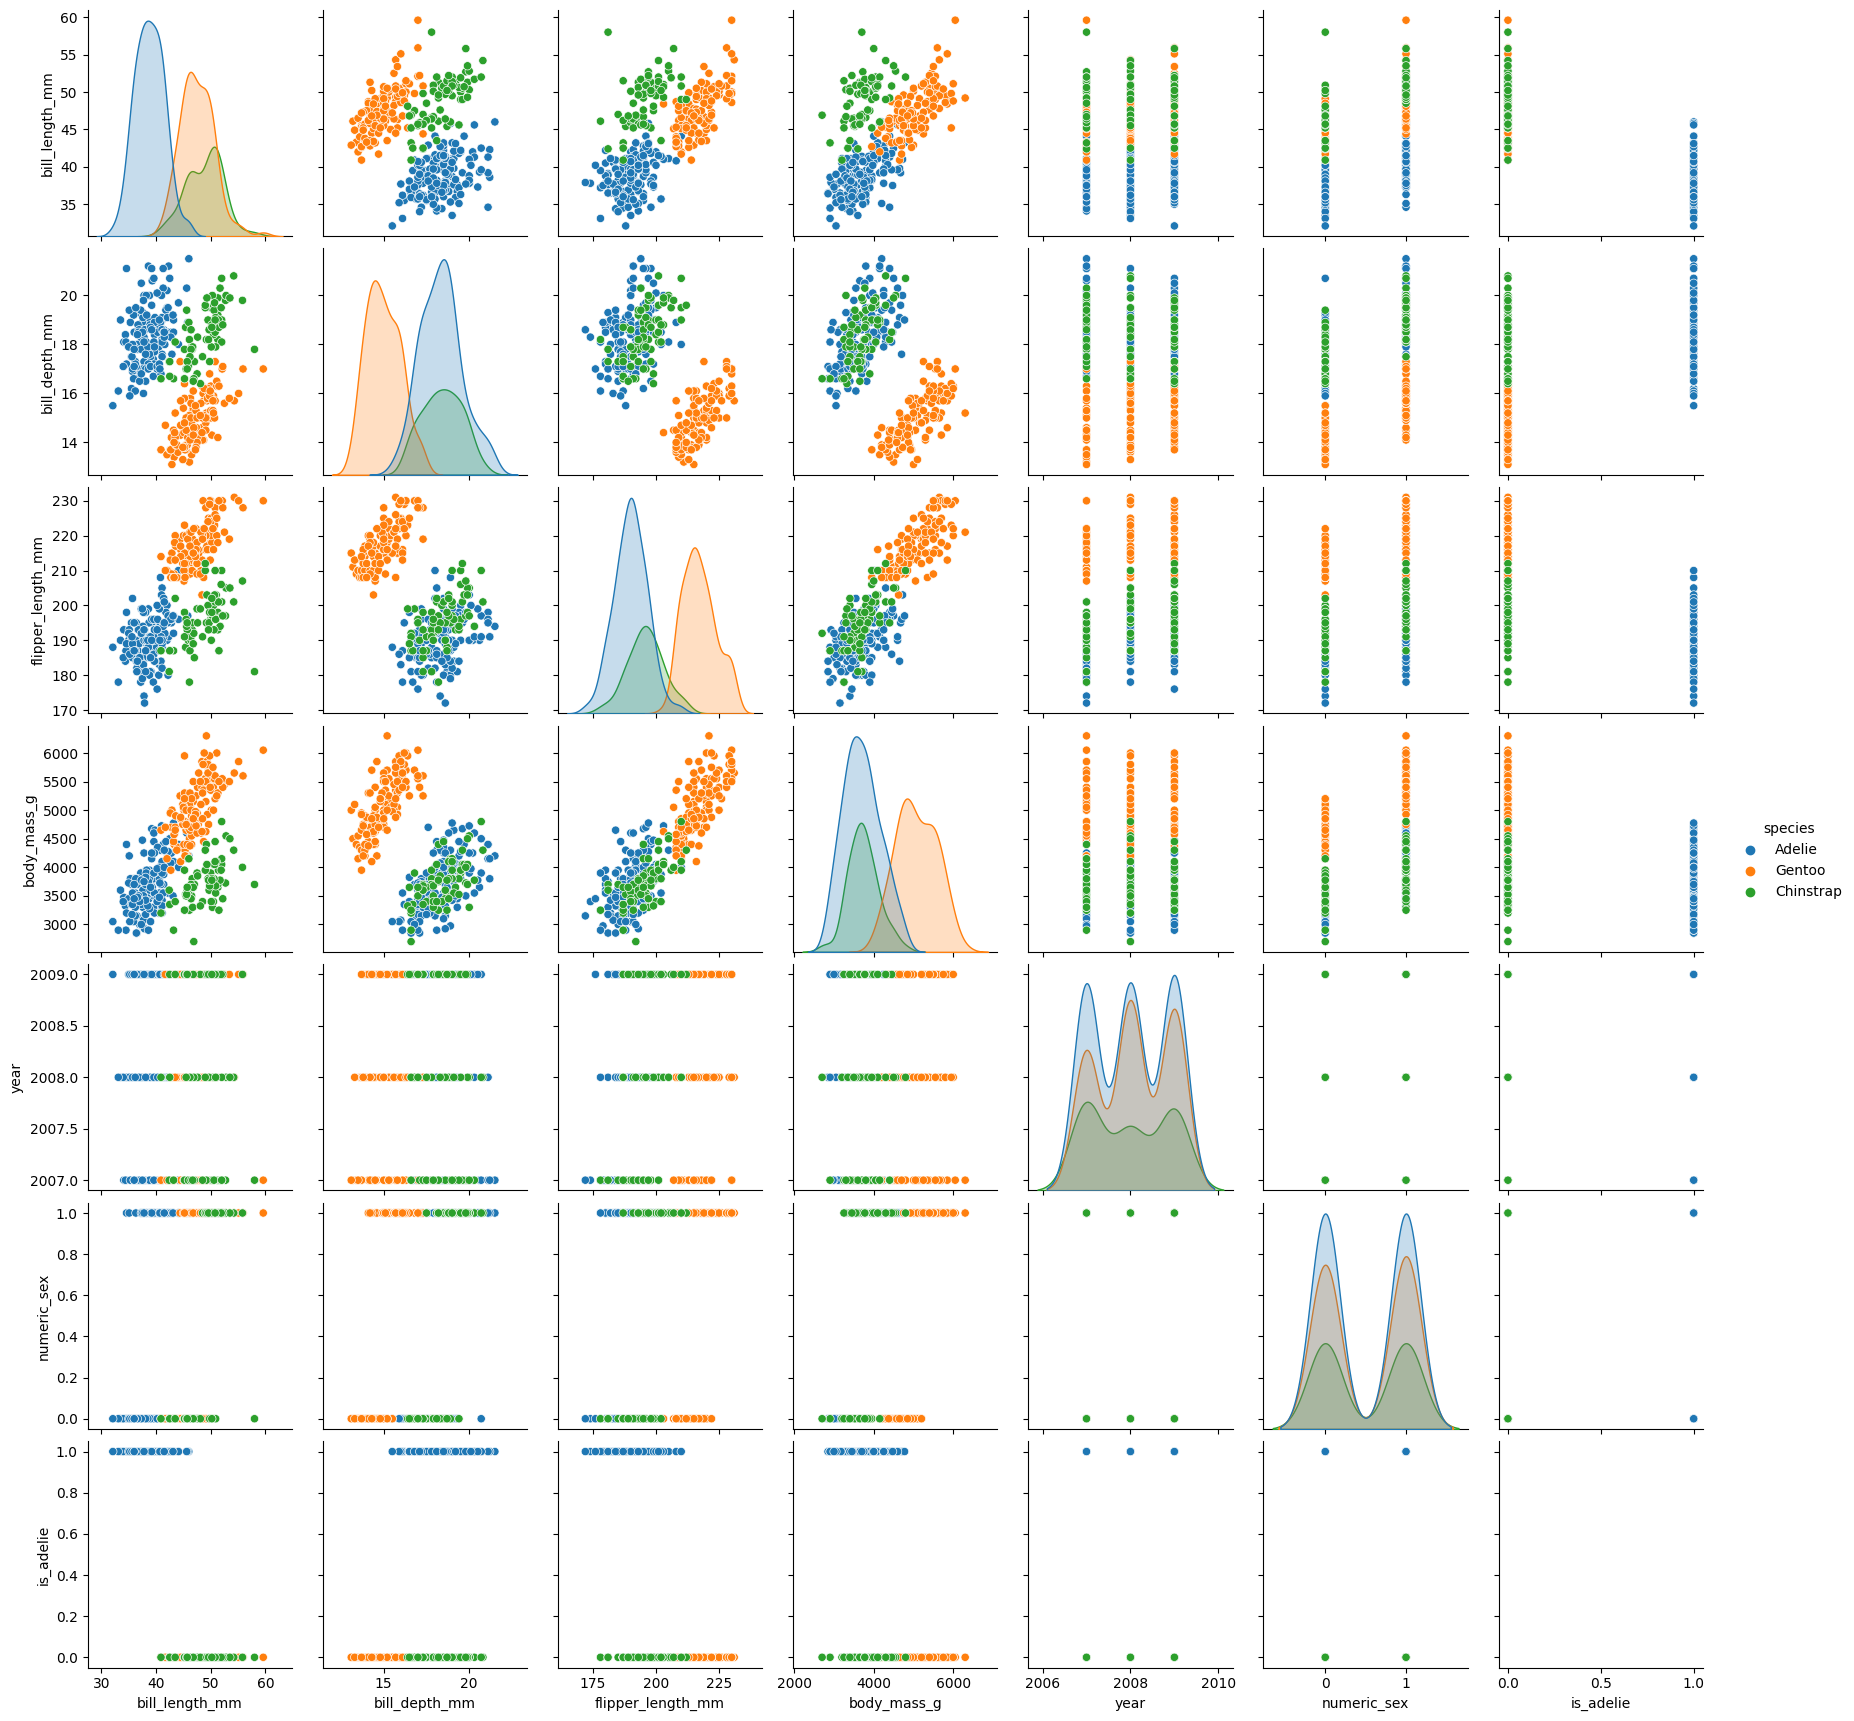

In [230]:
sns.pairplot(
data = datos,
hue = 'species',
)

# QUE HACER CUANDO HAY MUCHAS VARIABLES?

# --> Usar diferentes algoritmos como los siguientes

## ANALISIS DE COMPONENTES PRINCIPALES (PCA)

## TSNE (T-distributed Stochastic Neighbor Embedding)

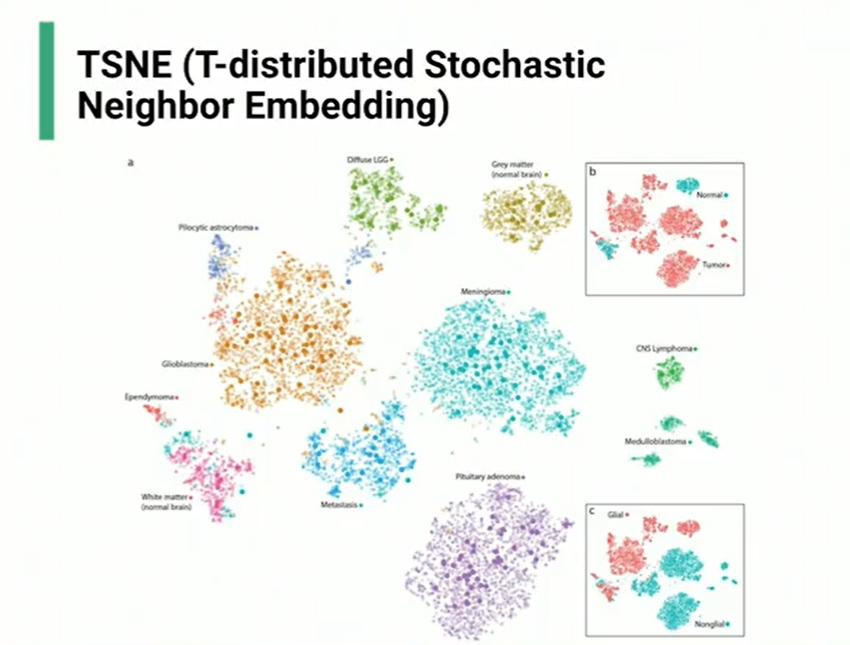

# UMAP: Uniform MAnifold Approximation and Projection of Dimension Reduction

# Diversidad de graficas al explorar graficas:

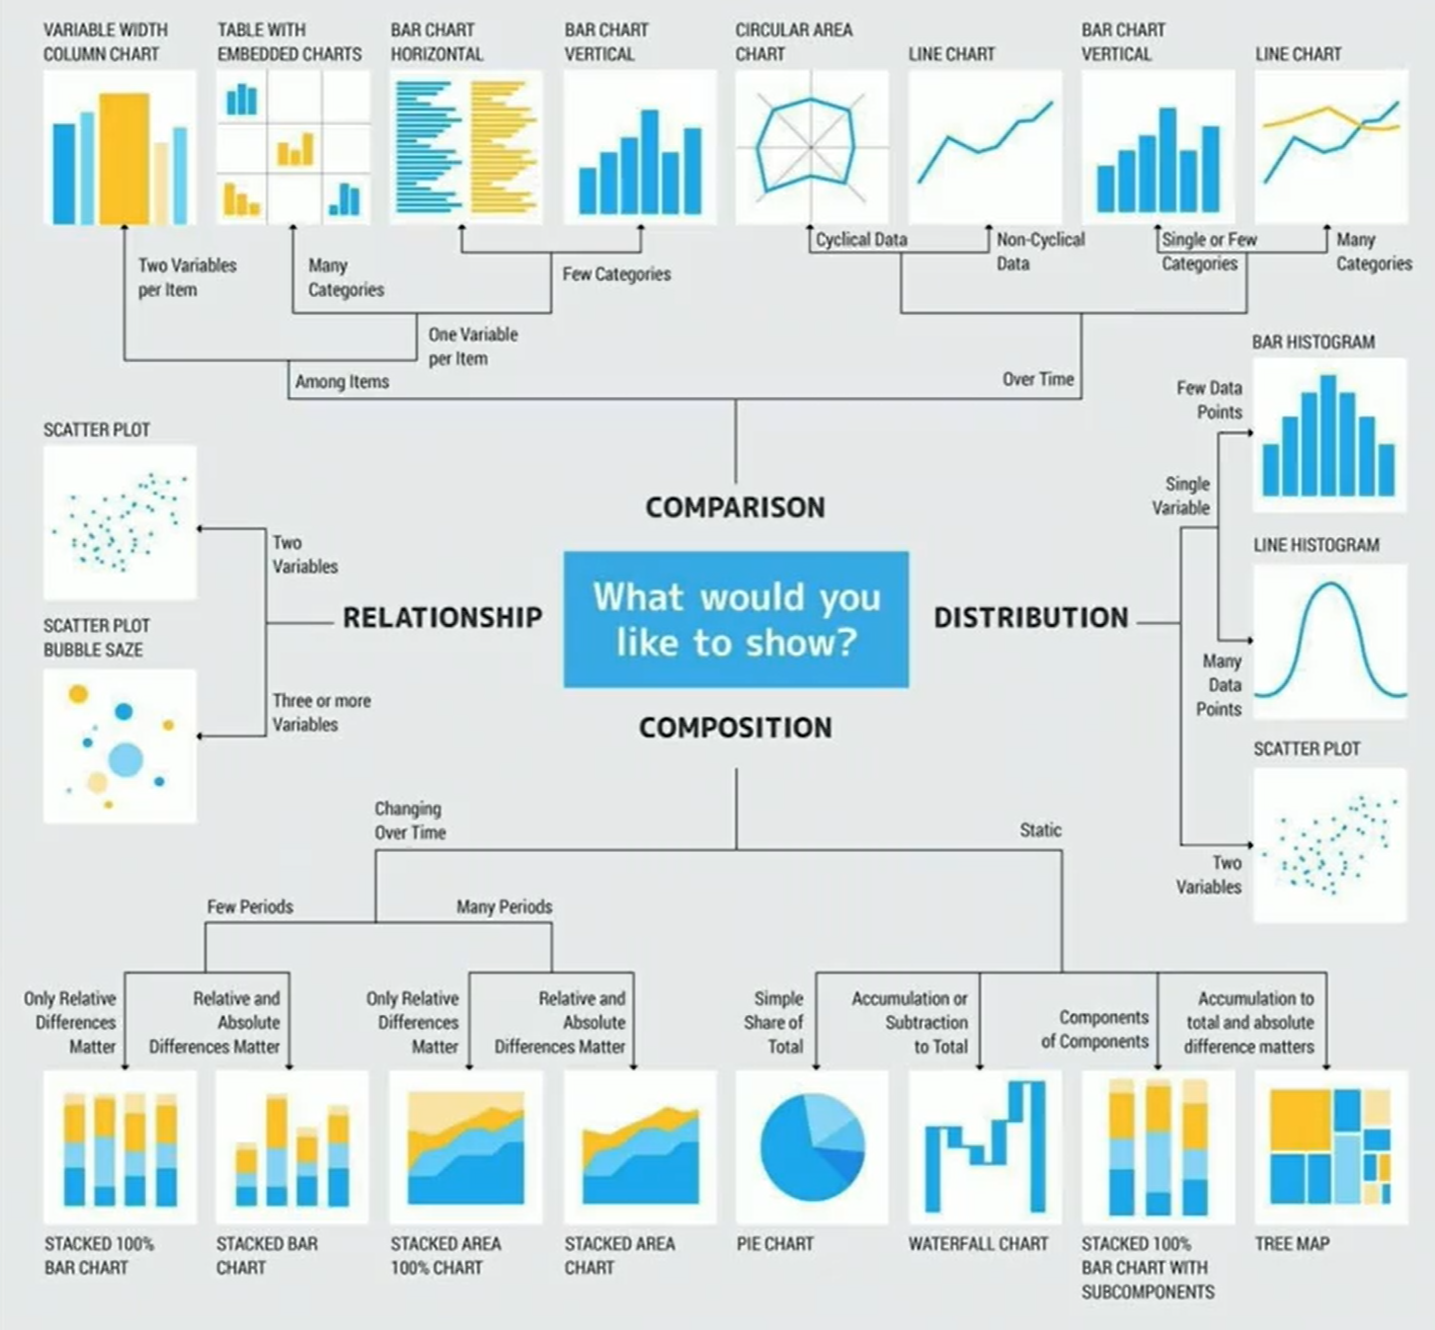

# Conclusiones

Las preguntas son la fuente de toda exploracion. Asegurate de definir qué quieres encontrar y quien necesita consultar los resultados desde un comienzo del EDA.

Es fundamental identificar el tipo de analisis de datos y variables que se requieren. Explora las dimensiones de tu conjunto de datos y qué tipo de variables contienen.

Siempre visualiza los estadisticos. 

Todos los conjuntos de datos son diferentes, concelos mas alla de sus numeros de resumen.

Visualiza una o varias variables de distintas maneras.

La diversidad de graficas te permitira conocer a detalle los matices de los datos

In [235]:

import pandas_profiling as pp

df = datos

pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]